### ***Assignment 1:***
 - Competitions: [Two Sigma: Using News to Predict Stock Movements](https://www.kaggle.com/c/two-sigma-financial-news/data)
    
***1. Why importantance?***
 - If we can use news articles to efficiently predict stock price, we can reduce investment risk.
    
***2. Data Source:***
    
 -  Market data (2007 to present) provided by [Intrinio - contains financial market information](https://intrinio.com/) such as opening price, closing price, trading volume, calculated returns, etc.
 - News data (2007 to present) Source: [Thomson Reuters](https://www.reuters.com/) - contains information about news articles/alerts published about assets, such as article details, sentiment, and other commentary.
    
***3. Data Type:***
 - **Market data:**
     - __time__ _(datetime64[ns, UTC])_  - the current time (in marketdata, all rows are taken at 22:00 UTC)
     - __assetCode__ _(object)_ - a unique id of an asset
     - __assetName__ _(category)_ - the name that corresponds to a group of assetCodes. These may be "Unknown" if thcorresponding assetCode does not have any rows in the news data.
     - __universe__ _(float64)_ - a boolean indicating whether or not the instrument on that day will be included in scoring. This value is not provided outside of the training data time period. The trading universe on a given date is the set of instruments that are avilable for trading (the scoring function will not consider instruments that are not in the trading universe). The trading universe changes daily.
     - __volume__ _(float64)_ - trading volume in shares for the day
     - __close__ _(float64)_ - the close price for the day (not adjusted for splits or dividends)
     - __open__ _(float64)_ - the open price for the day (not adjusted for splits or dividends)
     - __returnsClosePrevRaw1__ _(float64)_ - see returns explanation above
     - __returnsOpenPrevRaw1__ _(float64)_ - see returns explanation above
     - __returnsClosePrevMktres1__ _(float64)_ - see returns explanation above
     - __returnsOpenPrevMktres1__ _(float64)_ - see returns explanation above
     - __returnsClosePrevRaw10__ _(float64)_ - see returns explanation above
     - __returnsOpenPrevRaw10__ _(float64)_ - see returns explanation above
     - __returnsClosePrevMktres10__ _(float64)_ - see returns explanation above
     - __returnsOpenPrevMktres10__ _(float64)_ - see returns explanation above
     - __returnsOpenNextMktres10__ _(float64)_ - 10 day, market-residualized return. This is the target variable used in competition scoring. The market data has been filtered such that returnsOpenNextMktres10 is always not null.


 - **News data:**
    - __time__ _(datetime64[ns, UTC])_ - UTC timestamp showing when the data was available on the feed (second precision)
    - __sourceTimestamp__ _(datetime64[ns, UTC])_ - UTC timestamp of this news item when it was created
    - __firstCreated__ _(datetime64[ns, UTC])_ - UTC timestamp for the first version of the item
    - __sourceId__ _(object)_ - an Id for each news item
    - __headline__ _(object)_ - the item's headline
    - __urgency__ _(int8)_ - differentiates story types (1: alert, 3: article)
    - __takeSequence__ _(int16)_ - the take sequence number of the news item, starting at 1. For a given story, alerts and articles have separate sequences.
    - __provider__ _(category)_ - identifier for the organization which provided the news item (e.g. RTRS for Reuters News, BSW for Business Wire)
    - __subjects__ _(category)_ - topic codes and company identifiers that relate to this news item. Topic codes describe the news item's subject matter. These can cover asset classes, geographies, events, industries/sectors, and other types.
    - __audiences__ _(category)_ - identifies which desktop news product(s) the news item belongs to. They are typically tailored to specific audiences. (e.g. "M" for Money International News Service and "FB" for French General News Service)
    - __bodySize__ _(int32)_ - the size of the current version of the story body in characters
    - __companyCount__ _(int8)_ - the number of companies explicitly listed in the news item in the subjects field
    - __headlineTag__ _(object)_ - the Thomson Reuters headline tag for the news item
    - __marketCommentary__ _(bool)_ - boolean indicator that the item is discussing general market conditions, such as "After the Bell" summaries
    - __sentenceCount__ _(int16)_ - the total number of sentences in the news item. Can be used in conjunction with firstMentionSentence to determine the relative position of the first mention in the item.
    - __wordCount__ _(int32)_ - the total number of lexical tokens (words and punctuation) in the news item
    - __assetCodes__ _(category)_ - list of assets mentioned in the item
    - __vassetName__ _(category)_ - name of the asset
    - __firstMentionSentence__ _(int16)_ - the first sentence, starting with the headline, in which the scored asset is mentioned.
     1. headline
     2. first sentence of the story body
     3. second sentence of the body, etc
     4. the asset being scored was not found in the news item's headline or body text. As a result, the entire news item's text (headline + body) will be used to determine the sentiment score.
    - __relevance__ _(float32)_ - a decimal number indicating the relevance of the news item to the asset. It ranges from 0 to 1. If the asset is mentioned in the headline, the relevance is set to 1. When the item is an alert (urgency == 1), relevance should be gauged by firstMentionSentence instead.
    - __sentimentClass__ _(int8)_ - indicates the predominant sentiment class for this news item with respect to the asset. The indicated class is the one with the highest probability.
    - __sentimentNegative__ _(float32)_ - probability that the sentiment of the news item was negative for the asset
    - __sentimentNeutral__ _(float32)_ - probability that the sentiment of the news item was neutral for the asset
    - __sentimentPositive__ _(float32)_ - probability that the sentiment of the news item was positive for the asset
    - __sentimentWordCount__ _(int32)_ - the number of lexical tokens in the sections of the item text that are deemed relevant to the asset. This can be used in conjunction with wordCount to determine the proportion of the news item discussing the asset.
    - __noveltyCount12H__ _(int16)_ - The 12 hour novelty of the content within a news item on a particular asset. It is calculated by comparing it with the asset-specific text over a cache of previous news items that contain the asset.
    - __noveltyCount24H__ _(int16)_ - same as above, but for 24 hours
    - __noveltyCount3D__ _(int16)_ - same as above, but for 3 days
    - __noveltyCount5D__ _(int16)_ - same as above, but for 5 days
    - __noveltyCount7D__ _(int16)_ - same as above, but for 7 days
    - __volumeCounts12H__ _(int16)_ - the 12 hour volume of news for each asset. A cache of previous news items is maintained and the number of news items that mention the asset within each of five historical periods is calculated.
    - __volumeCounts24H__ _(int16)_ - same as above, but for 24 hours
    - __volumeCounts3D__ _(int16)_ - same as above, but for 3 days
    - __volumeCounts5D__ _(int16)_ - same as above, but for 5 days
    - __volumeCounts7D__ _(int16)_ - same as above, but for 7 days
    
***4. How to evalute ? (Loss function)***
    
 <img src="img/Hw1_loss_function.png" align="left" height='450' width='600'/>

### ___Assignment 2___:

***1. Main Question:***
 
 - 如何降低司機載客的空窗時間，根據每個時段與每個地段的乘車需求分配相對應的車輛數，不僅能降低司機間載客的空窗期，更能降低車輛支出的成本。
 
***2. Data Source:***

 -  [各縣市公路統計資料](https://www.thb.gov.tw/sites/ch/modules/download/download_list?node=3ba953bc-913d-4a13-b77b-0b7128fbe9a9&c=a2c29922-0c40-4a49-a8bc-65c3959b9cc4)

 - 行動支付的紀錄與汽車上的sensor
 
***3. Data Type:***
 - __difftime__ _(datetime64)_: 司機載客空窗時間
 - __passenger_sex__ _(int)_: 乘客性別
 - __car_type__ _(string)_: 車子型號
 - __work_time__ _(int)_: 司機工作時間
 - __driver_sex__ _(int)_: 司機姓別
 - __manufacture_year__ (datetime64): 車子製造日期
 - __route__ _(float)_: 行車路徑
 - __weather__ _(string)_: 天氣
 - __tempeature__ _(float)_: 溫度
 - __number_of_passenger__ _(int)_: 一次載客的乘客數目
 - ........
 
***4.How to evaluate?***
 - Mean Square Error:
   - $ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $ , $Y_i$司機實際載客空窗時間，$\hat{Y}_i$ 預測司機載客空窗時間

## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean_squared_error(y, yhat):
    """
    請完成這個 Function 後往下執行
    Calculate Mean Sequare Error
    Args:
        y: real value, type: numpy array
        yhat: predict value, type: numpy array
    """
    mse = sum((y - yhat)**2)/len(y)
    return mse

def mean_absolute_error(y, yhat):
    '''
    Calculate Mean Absoulute Error
    Args:
        y: real value, type: numpy array
        yhat: predict value, type: numpy array
    '''
    mae = sum(np.abs(y - yhat))/len(y)
    return mae

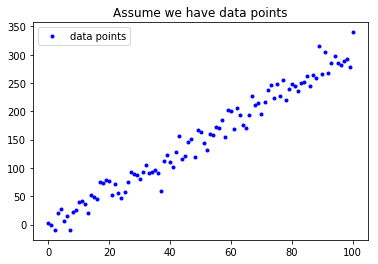

In [3]:
w = 3
b = 0.5

x_lin = np.linspace(0, 100, 101)

y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

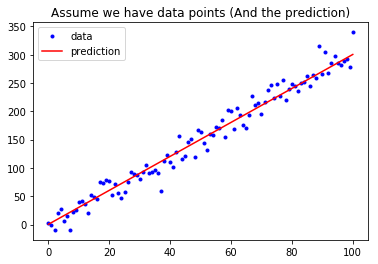

In [4]:
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [5]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 254.013
The Mean absolute error is 12.210
